# File and libraries

In [1]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_mv_input.csv'


file_tag = "Google Merch Store 2024-2025"


# DSLabs functions

In [2]:
%run "scripts/dslabs_functions.py"


# Data functions

In [3]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [4]:
test_data=True
# test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='Sessions'
series: Series = data[target]

test_split_threshold = 0.5

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    int64  
 1   Seven-day active users           427 non-null    int64  
 2   28-day active users              427 non-null    int64  
 3   Views                            427 non-null    int64  
 4   Events per session               427 non-null    float64
 5   Item-list view events            427 non-null    int64  
 6   Item view events                 427 non-null    int64  
 7   Add to baskets                   427 non-null    int64  
 8   Checkouts                        427 non-null    int64  
 9   E-commerce purchases             427 non-null    float64
 10  Average purchase revenue         427 non-null    float64
 11  Purchase revenue                 427 non-null    float64
 12  Fir

# Scale 0 - no scaling

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


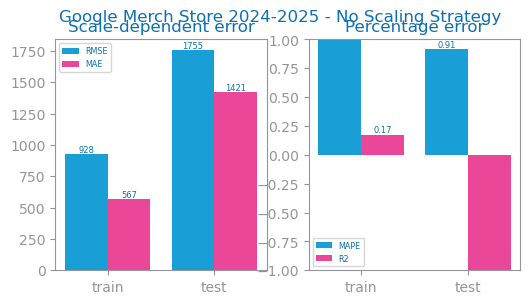

In [6]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
train, test = series_train_test_split(series, trn_pct=test_split_threshold)

trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(data)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - No Scaling Strategy")
savefig(f"images/{file_tag}_linear_regression_no_scale.png")

## no scaling plot

<Axes: xlabel='Date', ylabel='Sessions'>

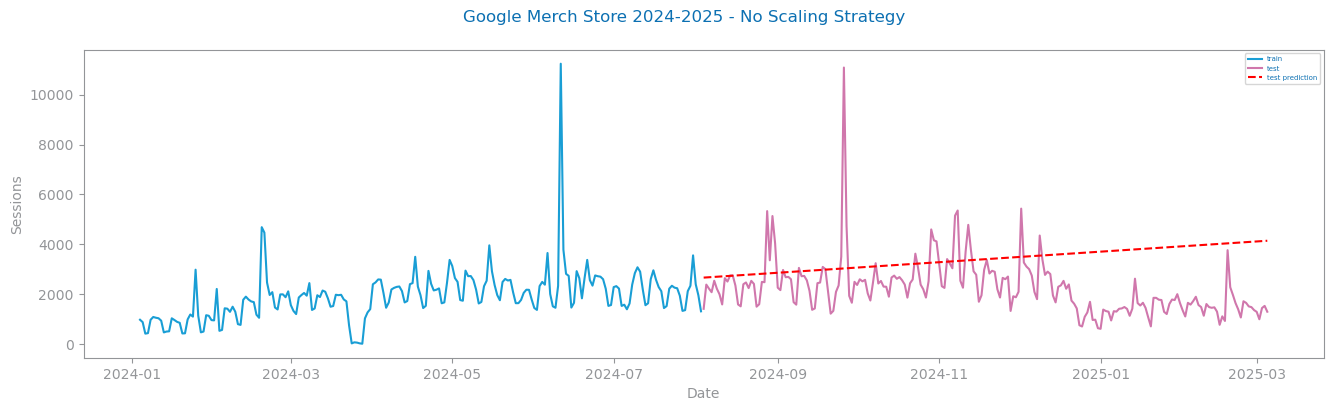

In [7]:
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - No Scaling Strategy",
    xlabel='Date',
    ylabel=target,
)

# Scale 1 - Standard Scaler

## Scale 1 strategy Application

In [ ]:

def apply_strategy_1(df):

    df_copy=df.copy()
    
    df_zscore=apply_standard_scaler(df_copy,target)

    return df_zscore


data_1=apply_strategy_1(data)

series_1: Series = data_1[target]

data_1



,Seven-day active users,28-day active users,Views,Events per session,Item-list view events,Item view events,Add to baskets,Checkouts,E-commerce purchases,Average purchase revenue,...,Sessions referral,season,commercial_season,week_of_month,day_of_week_nr,is_weekend,is_holiday,is_major_event_day,is_commercial_event_day,Sessions
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-04,-2.697404,-3.064131,-0.390290,1.571703,-0.551882,-0.181153,-0.013906,-0.140127,-0.146160,-0.342166,...,-0.432707,-0.423466,0.323359,-1.704564,0.0,-0.632456,-0.170046,-0.138178,-0.068599,982
2024-01-05,-2.517432,-3.010950,-0.408282,1.610270,-0.558458,-0.267646,0.092839,-0.153093,-0.037921,0.806316,...,-0.451646,-0.423466,0.323359,-1.704564,0.5,-0.632456,-0.170046,-0.138178,-0.068599,887
2024-01-06,-2.430615,-2.985296,-0.907511,0.629416,-0.784082,-0.637859,-0.520423,-0.509636,-0.730650,-0.898693,...,-0.599367,-0.423466,-0.395778,-1.704564,1.0,1.581139,-0.170046,-0.138178,-0.068599,426
2024-01-07,-2.338838,-2.958176,-0.873634,1.543969,-0.771331,-0.618374,-0.426236,-0.464257,-0.557468,-1.159933,...,-0.580429,-0.423466,-0.395778,-0.939213,1.5,1.581139,-0.170046,-0.138178,-0.068599,446
2024-01-08,-2.154732,-2.903774,-0.449614,0.869172,-0.564901,-0.260043,-0.198094,-0.354053,-0.427581,-0.904827,...,-0.409980,-0.423466,-0.395778,-0.939213,-1.5,-0.632456,-0.170046,-0.138178,-0.068599,981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,-0.856895,-0.697224,-0.668918,-0.653082,-0.526111,-0.613622,-0.480655,-0.626322,-0.644059,-0.755633,...,-0.474372,0.528218,-0.395778,-1.704564,1.0,1.581139,-0.170046,-0.138178,-0.068599,1298
2025-03-02,-0.871778,-0.704554,-0.638122,0.166045,-0.485040,-0.568949,-0.442980,-0.496670,-0.427581,-1.024740,...,-0.500886,0.528218,-0.395778,-0.939213,1.5,1.581139,-0.170046,-0.138178,-0.068599,1002
2025-03-03,-0.939578,-0.725402,-0.102909,1.208169,0.042443,-0.226776,-0.051581,0.073798,-0.189455,-0.069760,...,0.063487,0.528218,-0.395778,-0.939213,-1.5,-0.632456,-0.170046,-0.138178,-0.068599,1451


## Scale 1 evaluate

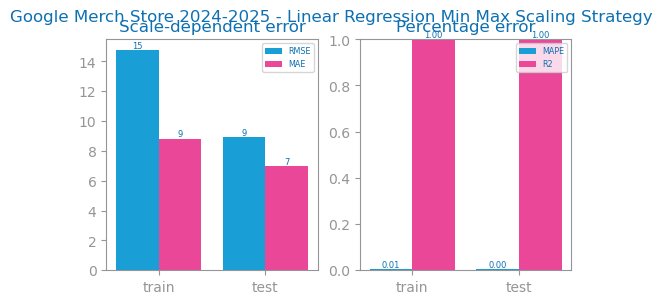

In [ ]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression




# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Prepare the training and testing data
trnX = train_1.drop(columns=[target])
trnY = train_1[target]
tstX = test_1.drop(columns=[target])
tstY = test_1[target]

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train_1.index)
prd_tst: Series = Series(model.predict(tstX), index=test_1.index)

plot_forecasting_eval(train_1, test_1, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression Standard Scaling Strategy")
savefig(f"images/{file_tag}_linear_regression_scale_standard.png")

## Scale 1 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

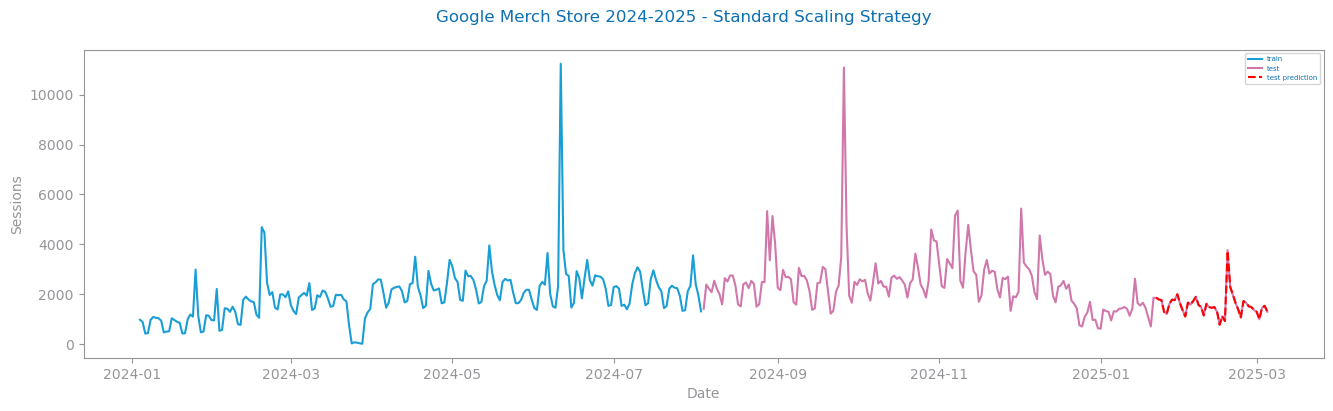

In [ ]:
plot_forecasting_series(
    train_1,
    test_1,
    prd_tst,
    title=f"{file_tag} - Standard Scaling Strategy",
    xlabel='Date',
    ylabel=target,
)

# Scale 2 - MinMax Scaler


## Scale 2 strategy aplication

In [ ]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Scaling chapter
    df_copy=apply_min_max_scaler(df,target)

    return df_copy

data_2=apply_strategy_2(data)

series_2: Series = data_2[target]

## Scale 2 evaluate

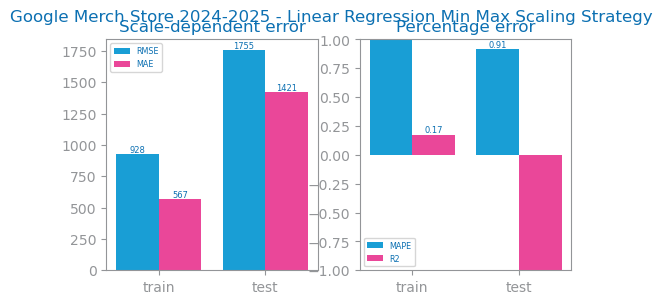

In [ ]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
train_2, test_2 = series_train_test_split(data_2, trn_pct=test_split_threshold)

# Prepare the training and testing data
trnX = train_2.drop(columns=[target])
trnY = train_2[target]
tstX = test_2.drop(columns=[target])
tstY = test_2[target]

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train_2.index)
prd_tst: Series = Series(model.predict(tstX), index=test_2.index)

plot_forecasting_eval(train_2, test_2, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression Min Max Scaling Strategy")
savefig(f"images/{file_tag}_linear_regression_scale_min_max.png")

## Scale 2 Plot Forecast

<Axes: xlabel='Date', ylabel='Sessions'>

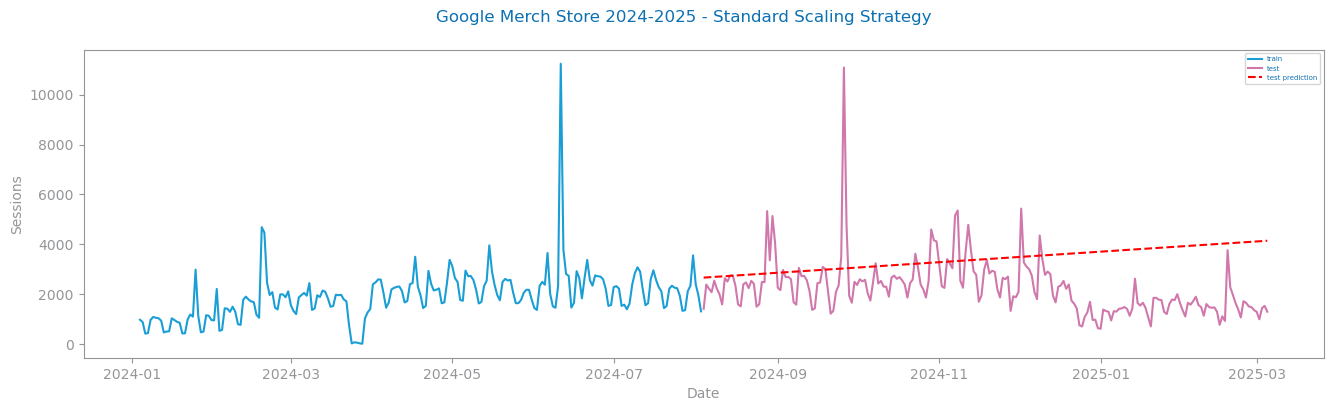

In [ ]:
plot_forecasting_series(
    train_2,
    test_2,
    prd_tst,
    title=f"{file_tag} - Standard Scaling Strategy",
    xlabel='Date',
    ylabel=target,
)

# scaling plot

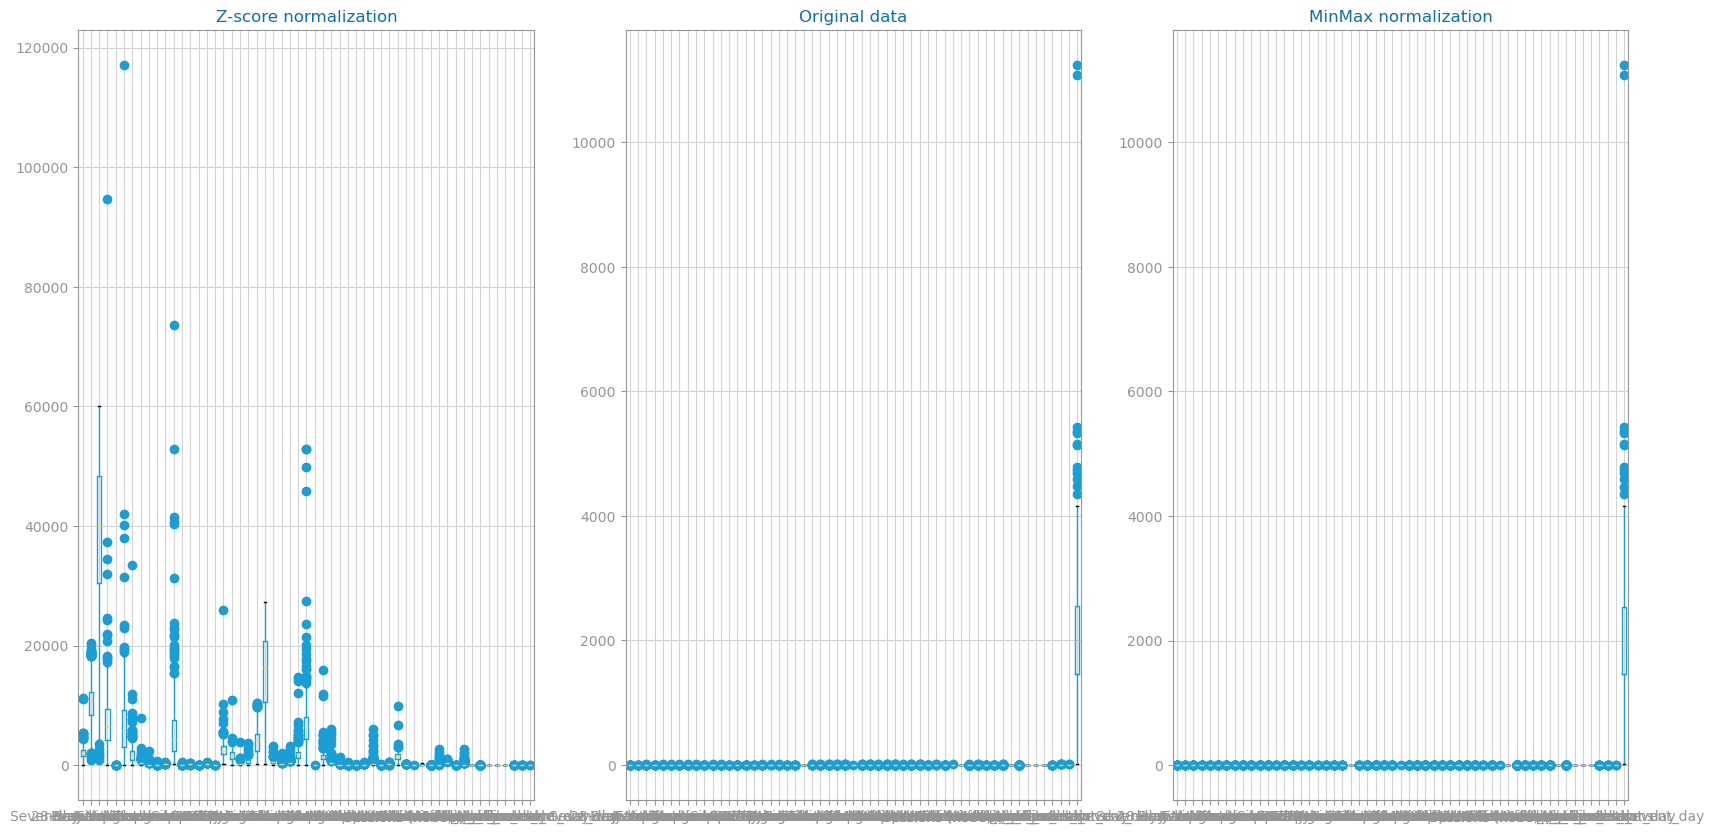

In [ ]:

from matplotlib.pyplot import subplots, show

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 1].set_title("Original data")
data.boxplot(ax=axs[0, 0])

axs[0, 0].set_title("Z-score normalization")
data_1.boxplot(ax=axs[0, 1])

axs[0, 2].set_title("MinMax normalization")
data_2.boxplot(ax=axs[0, 2])

savefig(f"images/{file_tag}_scaling_plots_evaluation.png")

show()

# Approach uplift comparison

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["No Scaling", "Standard Scaling", "MinMax Scaling"],
    "MAE": [
        mean_absolute_error(test, prd_tst),
        mean_absolute_error(test_1, prd_tst),
        mean_absolute_error(test_2, prd_tst)
    ],
    "MSE": [
        mean_squared_error(test, prd_tst),
        mean_squared_error(test_1, prd_tst),
        mean_squared_error(test_2, prd_tst)
    ],
    "RMSE": [
        mean_squared_error(test, prd_tst, squared=False),
        mean_squared_error(test_1, prd_tst, squared=False),
        mean_squared_error(test_2, prd_tst, squared=False)
    ],
    "R²": [
        r2_score(test, prd_tst),
        r2_score(test_1, prd_tst),
        r2_score(test_2, prd_tst)
    ],
    "MAPE": [
        mean_absolute_percentage_error(test, prd_tst),
        mean_absolute_percentage_error(test_1, prd_tst),
        mean_absolute_percentage_error(test_2, prd_tst)
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

              Model          MAE           MSE         RMSE        R²  \
0        No Scaling  1421.330101  3.079354e+06  1754.808955 -1.522217   
1  Standard Scaling  1421.330101  3.079354e+06  1754.808955 -1.522217   
2    MinMax Scaling  1421.330101  3.079354e+06  1754.808955 -1.522217   

        MAPE  
0  91.326176  
1  91.326176  
2  91.326176  


# save to csv

In [ ]:
if test_data==False:
    

    data_save=data.copy()

    # apply winning strategy
    # data_save=apply_strategy_2(data_save)

    # data_save.reset_index(inplace=True)
    
        
    data_save.to_csv(f"data/df_merch_0_2024_agg_time_scaling_input.csv", index=False)
    

    print(data_save.columns)